In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm

In [4]:
RRNet_catalog = pd.read_csv("../data/DR7MRS_RRNet_parametes.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/DR7MRS_RRNet_parametes.csv'

In [3]:
RRNet_catalog.columns

Index(['obsid', 'filename', 'ra', 'dec', 'extname_blue', 'extname_red',
       'snr_blue', 'snr_red', 'Teff[K]', 'Teff[K]_err', 'Logg', 'Logg_err',
       'CH', 'CH_err', 'NH', 'NH_err', 'OH', 'OH_err', 'MgH', 'MgH_err', 'AlH',
       'AlH_err', 'SiH', 'SiH_err', 'SH', 'SH_err', 'KH', 'KH_err', 'CaH',
       'CaH_err', 'TiH', 'TiH_err', 'CrH', 'CrH_err', 'MnH', 'MnH_err', 'FeH',
       'FeH_err', 'NiH', 'NiH_err', 'CuH', 'CuH_err', 'flag'],
      dtype='object')

In [4]:
RRNet_catalog.shape

(2377510, 43)

# Draw teff-log diagram

In [3]:
# Disrupt the order
RRNet_catalog = RRNet_catalog.sample(frac=1)
RRNet_catalog.columns

Index(['obsid', 'filename', 'ra', 'dec', 'extname_blue', 'extname_red',
       'snr_blue', 'snr_red', 'Teff[K]', 'Teff[K]_err', 'Logg', 'Logg_err',
       'CH', 'CH_err', 'NH', 'NH_err', 'OH', 'OH_err', 'MgH', 'MgH_err', 'AlH',
       'AlH_err', 'SiH', 'SiH_err', 'SH', 'SH_err', 'KH', 'KH_err', 'CaH',
       'CaH_err', 'TiH', 'TiH_err', 'CrH', 'CrH_err', 'MnH', 'MnH_err', 'FeH',
       'FeH_err', 'NiH', 'NiH_err', 'CuH', 'CuH_err', 'flag'],
      dtype='object')

In [4]:
MIST_data = pd.read_csv('../data/other_data/MIST_iso_7Gyr.csv')

In [1]:
fig = plt.figure(figsize=(8,6),dpi=180)
show_interval = 5

teff = RRNet_catalog['Teff[K]'].values[::show_interval]
logg = RRNet_catalog['Logg'].values[::show_interval]
feh = RRNet_catalog['FeH'].values[::show_interval]

feh[feh > 0.5] = 0.5
feh[feh < -1.5] = -1.5

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter(teff, 
            logg, 
            c=feh, s=0.1, cmap="rainbow")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14) 
cb.set_label('$\mathrm{[Fe/H]}$ of RRNet (dex)', fontsize=18)
plt.ylim([5.2,0.8])
plt.xlim([7000,3500])
# plt.clim([-1,0.5])
plt.xlabel('$T_{\mathrm{eff}}$ of RRNet (K)', fontsize=18)
plt.ylabel('$\log g$ of RRNet (dex)', fontsize=18)
plt.grid(False) 

plt.plot(10 ** MIST_data['teff_-0.5'], MIST_data['logg_-0.5'], label='[Fe/H]=-0.5', c='c')
plt.plot(10 ** MIST_data['teff_0'], MIST_data['logg_0'], label='[Fe/H]=0.0', c='y')
plt.plot(10 ** MIST_data['teff_0.5'], MIST_data['logg_0.5'], label='[Fe/H]=0.5', c='r')
# plt.legend(loc='center left')
plt.legend(loc=(0.055,0.73))

plt.tight_layout()
# plt.savefig('../images/RRNet_LAMOST_pred_all.pdf')
plt.savefig('../images/APSCAP_LAMOST_pred_all.png')
plt.show()

NameError: name 'plt' is not defined

# Teff-logg plots with different signal-to-noise ratios

/tmp/ipykernel_1845883/4150554298.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


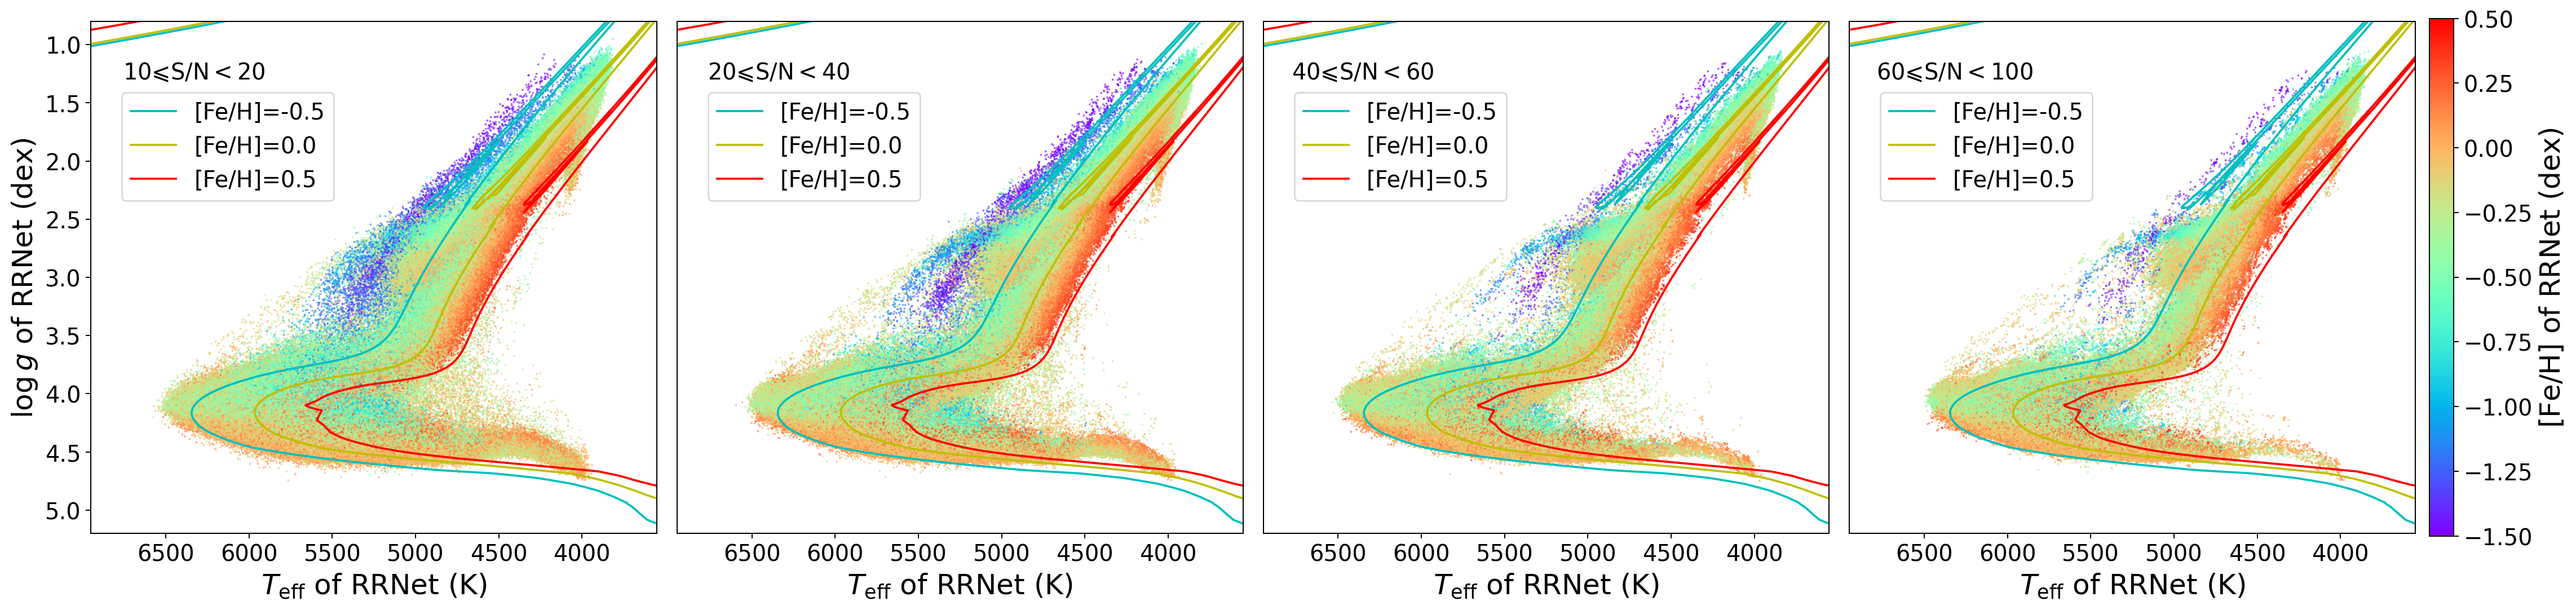

In [6]:
snr_region = [[10, 20], [20, 40], [40, 60], [60,100]]
show_interval = 1

fig, ax = plt.subplots(1, 4, figsize=(6*4,6),dpi=180)
ax = ax.flatten()
fig.subplots_adjust(wspace=0)

for i in range(4):
    index = np.where(RRNet_catalog['snr_blue'].apply(lambda x: True if x<snr_region[i][1] and x >=snr_region[i][0] else False))[0]
    

    teff = RRNet_catalog['Teff[K]'].iloc[index].values[::show_interval]
    logg = RRNet_catalog['Logg'].iloc[index].values[::show_interval]
    feh = RRNet_catalog['FeH'].iloc[index].values[::show_interval]

    feh[feh > 0.5] = 0.5
    feh[feh < -1.5] = -1.5
    
    
    plt.figtext(0.0525+(0.24*i), 0.88, "$%d \leqslant \mathrm{S/N} < %d$"%(snr_region[i][0], snr_region[i][1]),fontsize=16)


    ax[i].tick_params(labelsize=16)
    if i == 0:
        a0 = ax[i].scatter(teff, logg, c=feh, s=0.1, cmap="rainbow")
    else:
        ax[i].scatter(teff, logg, c=feh, s=0.1, cmap="rainbow")

    ax[i].set_ylim([5.2,0.8])
    ax[i].set_xlim([6950,3550])
    # plt.clim([-1,0.5])
    ax[i].set_xlabel('$T_{\mathrm{eff}}$ of RRNet (K)', fontsize=20)
    if i == 0:
        ax[i].set_ylabel('$\log g$ of RRNet (dex)', fontsize=20)
    else:
        ax[i].set_yticks([])
        

    ax[i].plot(10 ** MIST_data['teff_-0.5'], MIST_data['logg_-0.5'], label='[Fe/H]=-0.5', c='c')
    ax[i].plot(10 ** MIST_data['teff_0'], MIST_data['logg_0'], label='[Fe/H]=0.0', c='y')
    ax[i].plot(10 ** MIST_data['teff_0.5'], MIST_data['logg_0.5'], label='[Fe/H]=0.5', c='r')
    # plt.legend(loc='center left')
    ax[i].legend(loc=(0.055,0.65), fontsize=16)

    
position=fig.add_axes([0.9995, 0.13, 0.01, 0.85])

cbar = fig.colorbar(a0, ax = ax,cax=position, extend='neither', spacing='proportional', orientation='vertical')
cbar.set_label('$\mathrm{[Fe/H]}$ of RRNet (dex)', size=20)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout()
# plt.savefig('../images/RRNet_LAMOST_pred_snr.pdf', bbox_inches='tight')
plt.savefig('../images/RRNet_LAMOST_pred_snr.png', bbox_inches='tight')
plt.show()

# Density distribution of [X/Fe] relative to [Fe/H

100%|██████████| 28/28 [11:10<00:00, 23.94s/it]


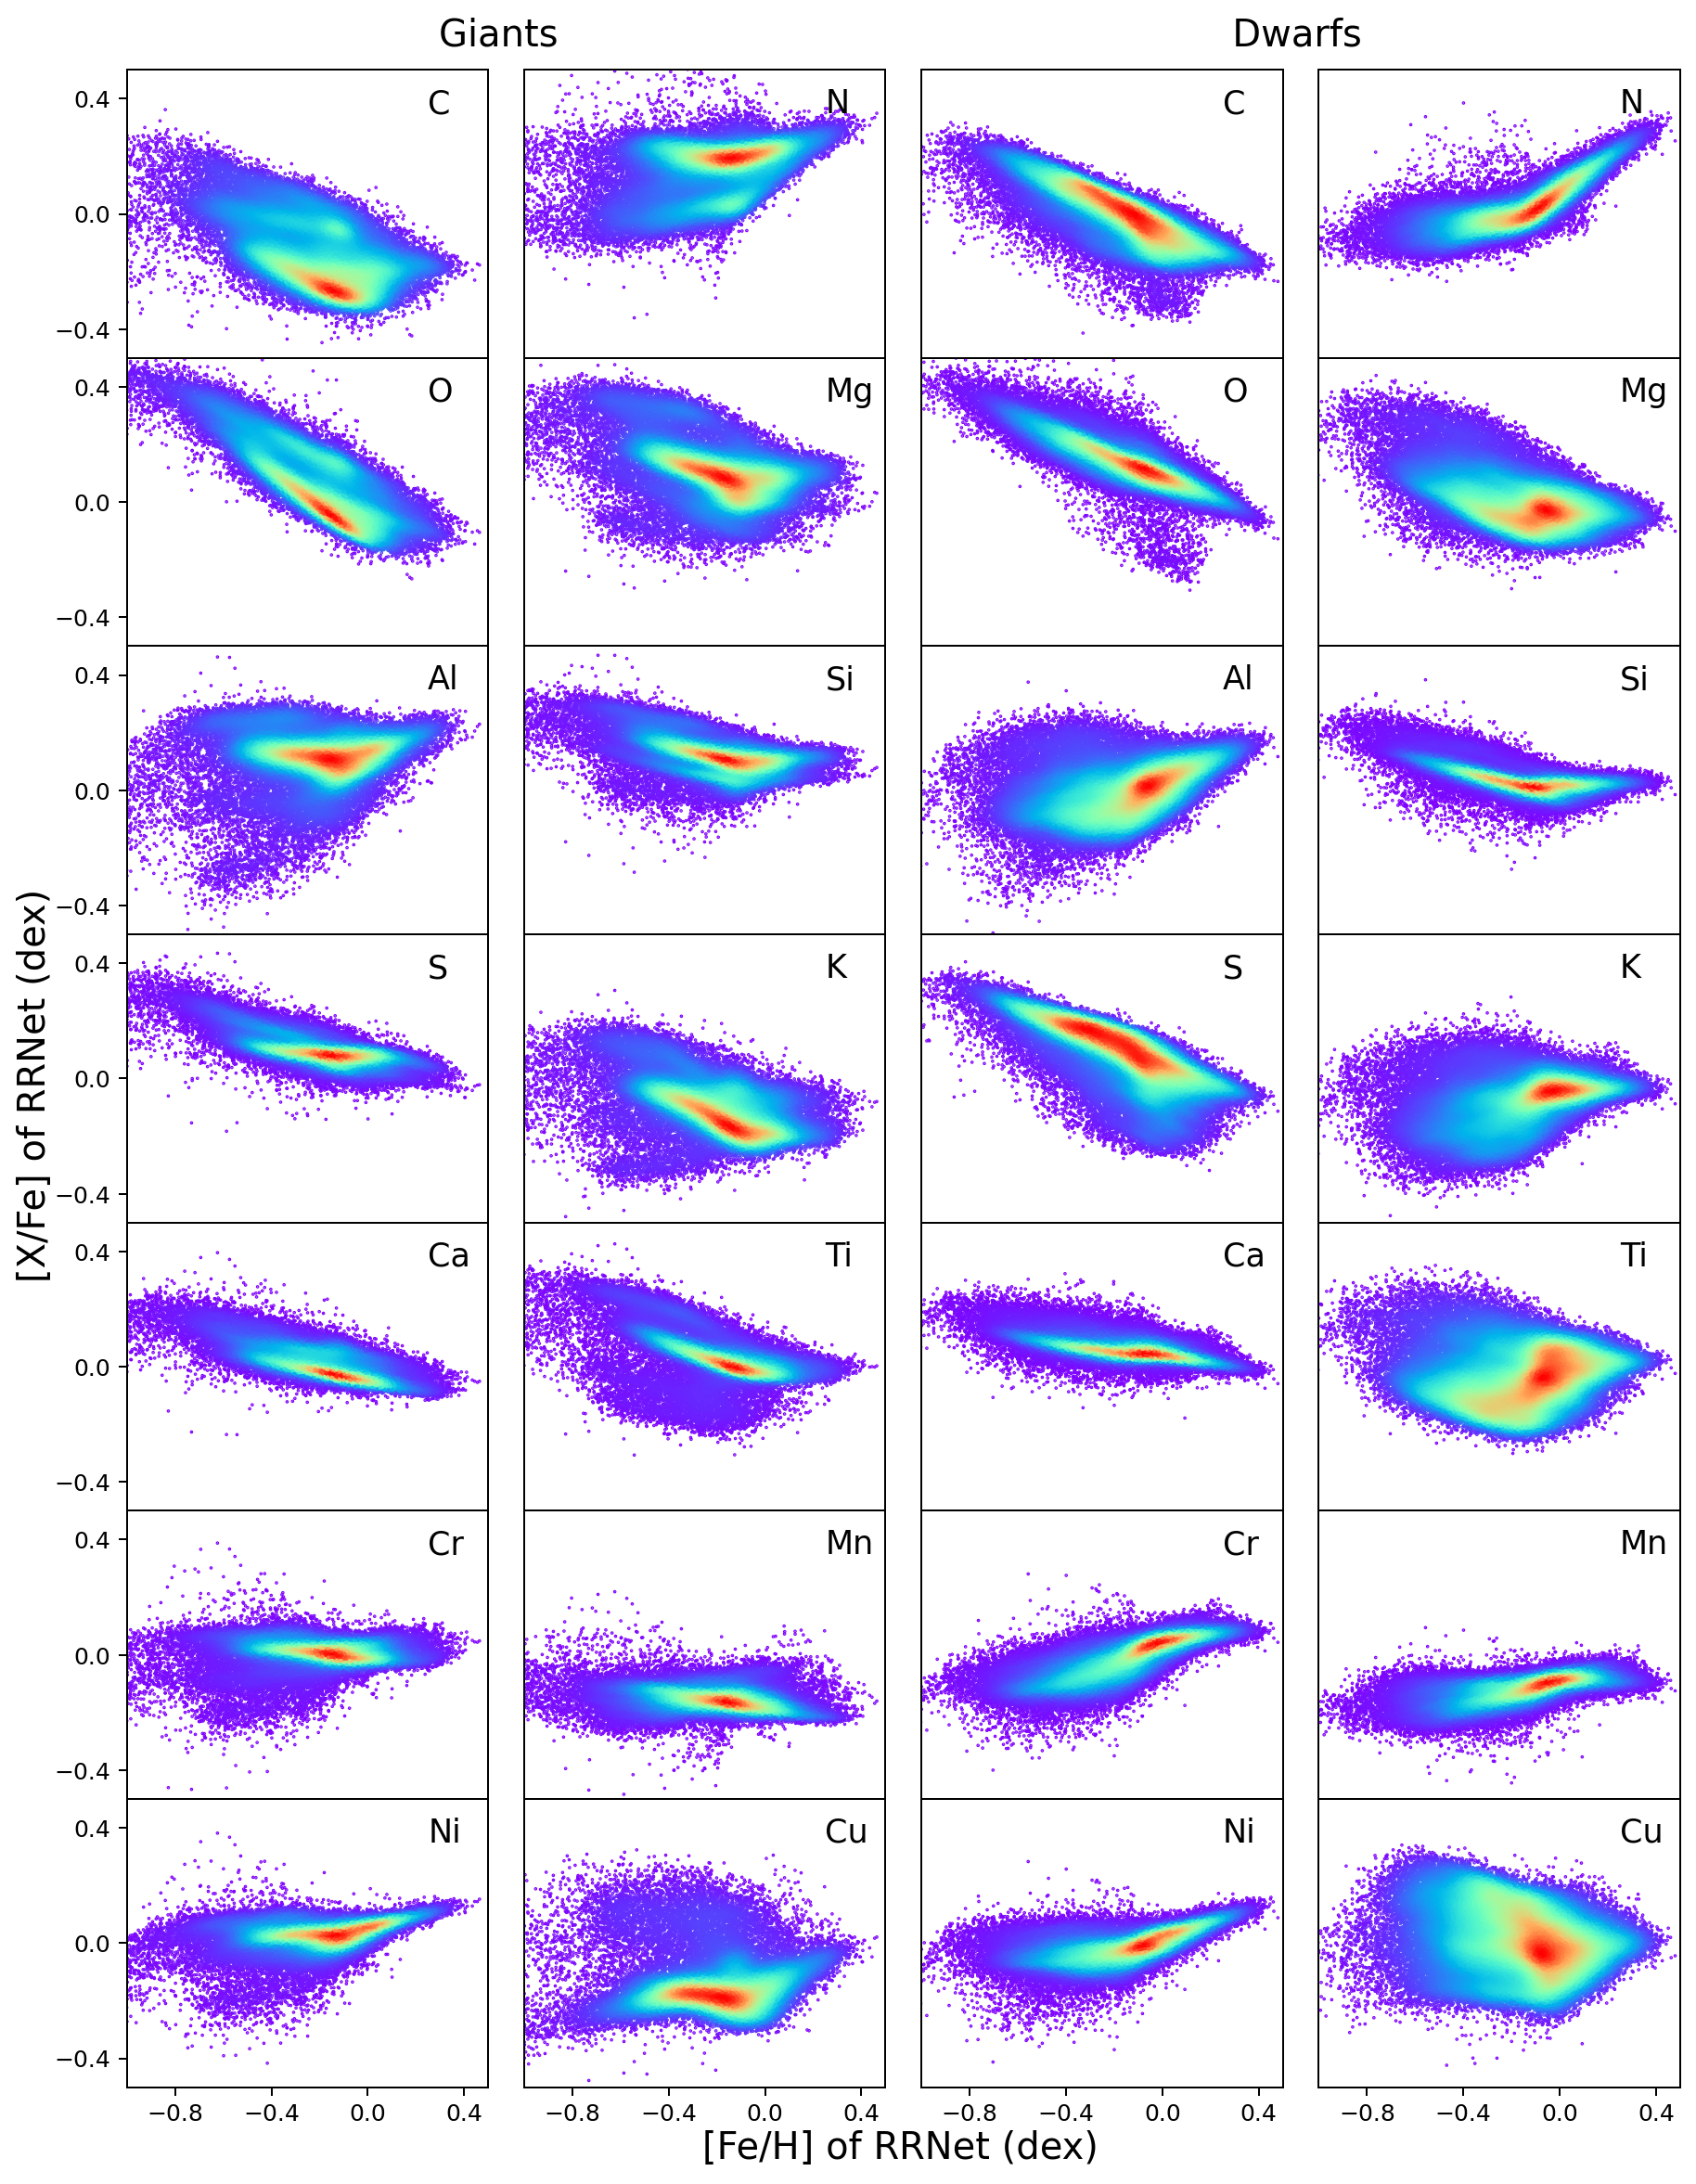

In [7]:
show_interval = 25

# YlGnBu   rainbow winter viridis
my_cmap = "rainbow"

lable_list = ['CH', 'NH', 'OH', 'MgH', 'AlH', 'SiH', 'SH', 
              'KH', 'CaH', 'TiH', 'CrH', 'MnH', 'NiH','CuH']

text_list = ['C', 'N', 'O', 'Mg', 'Al', 'Si','S', 
             'K', 'Ca', 'Ti', 'Cr', 'Mn', 'Ni', 'Cu']

fig, ax = plt.subplots(7, 4, figsize=(12,16), dpi=180)
fig.subplots_adjust(hspace=0, wspace=0.1)

ax = ax.flatten()

dwarf_giants_RRNet_catalog = [RRNet_catalog[RRNet_catalog["Logg"] < 4], RRNet_catalog[RRNet_catalog["Logg"] > 4]]

for i in tqdm(range(len(text_list)*2)):
    dwarf_giants_flag = int((i % 4) > 1)
    label_index = i % 2 + 2*(i // 4)
#     print(dwarf_giants_flag, label_index)
   
    ax[i].set_xlim([-1, 0.5])
    ax[i].set_ylim([-0.5, 0.5])
    ax[i].grid(False)
    if i % 4 == 0:
        ax[i].set_yticks([-0.4, 0, 0.4])
    else:
        ax[i].set_yticks([])
        
    if i > 23:
        ax[i].set_xticks([-0.8, -0.4, 0, 0.4])
    else:
        ax[i].set_xticks([])
        
        
    
    ax[i].text(0.25,0.35,text_list[label_index], size=14)
        

    x = dwarf_giants_RRNet_catalog[dwarf_giants_flag]["FeH"].values[::show_interval]
    y = (dwarf_giants_RRNet_catalog[dwarf_giants_flag][lable_list[label_index]].values[::show_interval]) - x
  
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    z = (z - z.min()) / (z.max() - z.min())
        

    ax[i].scatter(x, y, c=z, s=.2, cmap=my_cmap)
        

fig.supxlabel("[Fe/H] of RRNet (dex)", size=16, position=(0.511,0.095,1))
fig.supylabel("[X/Fe] of RRNet (dex)", size=16, position=(0.07,0.5,1))
fig.suptitle("Giants"+" "*57+ "Dwarfs", size=16, position=(0.511,0.9,1))

plt.savefig('../images/RRNet_LAMOST_pred_XFe_dis.png', bbox_inches='tight')
# plt.savefig('../images/RRNet_LAMOST_pred_XFe_dis.pdf', bbox_inches='tight')
plt.show()





# Uncertainty Analysis

In [28]:
snr_region_list = [[10, 15],[15,20], 
                   [20, 25],[25, 30], 
                   [30, 35], [35, 40],
                   [40, 45],[45,50], 
                   [50, 55],[55, 60], 
                   [60, 65], [65, 70],
                   [70, 75],[75,80], 
                   [80, 85],[85, 90], 
                   [90, 95], [95, 100],
                   [100, 100],
                  ]

label_name_list = ['Teff[K]', 'Logg', 'FeH', 'CH', 'NH', 'OH', 'MgH', 'AlH', 'SiH',
                  'SH', 'KH', 'CaH', 'TiH', 'CrH', 'MnH', 'NiH', 'CuH']

# Uncertainty in estimation
rrnet_pred_err = RRNet_catalog[["%s_err"%name for name in label_name_list]].values.astype(np.float32)
snr = RRNet_catalog[['snr_blue','snr_red']].min(axis = 1)
errorbar_rrnet_pred = np.zeros((len(snr_region_list), len(label_name_list)))

# Uncertainty of repeated observations
RRNet_catalog["min_snr"] = RRNet_catalog[['snr_blue','snr_red']].min(axis = 1)
gr_count = RRNet_catalog.groupby(by=['obsid']).count()
gr_mean = RRNet_catalog.groupby(by=['obsid']).mean()
gr_std = RRNet_catalog.groupby(by=['obsid']).std()
mean_gr = gr_mean[gr_count['min_snr']>=5][label_name_list].values
std_gr = gr_std[gr_count['min_snr']>=5][label_name_list].values
snr_gr = gr_mean[gr_count['min_snr']>=5]["min_snr"]
errorbar_repeated_observation = np.zeros((len(snr_region_list), len(label_name_list)))


count = 0
for snr_region in tqdm(snr_region_list):
    if snr_region[0] < snr_region[1]:
        snr_index_rrnet_pred = np.where(snr.apply(lambda x: True if x<snr_region[1] and x >=snr_region[0] else False))[0]
        snr_index_repeated_observation = np.where(snr_gr.apply(lambda x: True if x<snr_region[1] and x >=snr_region[0] else False))[0]
    else:
        snr_index_rrnet_pred = np.where(snr.apply(lambda x: True if x >=snr_region[0] else False))[0]
        snr_index_repeated_observation = np.where(snr_gr.apply(lambda x: True if x >=snr_region[0] else False))[0]
    
    err_mean_rrnet_pred = rrnet_pred_err[snr_index_rrnet_pred].mean(axis=0)
    err_mean_repeated_observation = std_gr[snr_index_repeated_observation].mean(axis=0)
    
   
    errorbar_rrnet_pred[count] = err_mean_rrnet_pred
    errorbar_repeated_observation[count] = err_mean_repeated_observation
    count += 1
#     print(snr_region, err_mean_rrnet_pred, err_mean_repeated_observation)

# errorbar_rrnet_pred[:,0] *= 0.001
# errorbar_repeated_observation[:,0] *= 0.001

100%|██████████| 19/19 [00:10<00:00,  1.74it/s]


In [5]:
fig = plt.figure(figsize=(20,16),dpi=180)

test_loc_list = [180, 0.225, 0.1, 0.12, 0.18, 0.165, 0.09, 0.12, 0.09, 0.125, 0.205, 0.105, 0.185, 0.17, 0.18, 0.12, 0.26]

for i in range(len(label_name_list)):
    ax = plt.subplot(6,3,i+1)
    

    plt.errorbar(range(len(snr_region_list)), 
                 errorbar_rrnet_pred[:,i],
                 errorbar_repeated_observation[:,i],
                 color="k",
                      fmt='o-',
                      capsize=6)
    print(errorbar_rrnet_pred[2, i])
    
    plt.xticks([0,2,4,6,8,10,12,14,16,18], 
               [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], size=14)
    plt.yticks(size=14)
    
    if i == 0:
        plt.text(15, test_loc_list[i], "$T_\mathregular{eff}$", size=16)
    elif i == 1:
        plt.text(15, test_loc_list[i], "$\log g$", size=16)
    else:
        plt.text(15, test_loc_list[i], "[%s/H]"%label_name_list[i][:-1], size=16)


fig.supxlabel("S/N", size=16, position=(0.515,0.09,1))
fig.supylabel("Uncertainty of LAMOST-RRNet", size=16, position=(0.08,0.5,1))

plt.savefig('../images/uncertainties_analysis_snr.png', bbox_inches='tight')
plt.savefig('../images/uncertainties_analysis_snr.pdf', bbox_inches='tight')
plt.show()

NameError: name 'label_name_list' is not defined

<Figure size 3600x2880 with 0 Axes>

/tmp/ipykernel_1853273/1959335388.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabel_name, size=16)
/tmp/ipykernel_1853273/1959335388.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabel_name, size=16)


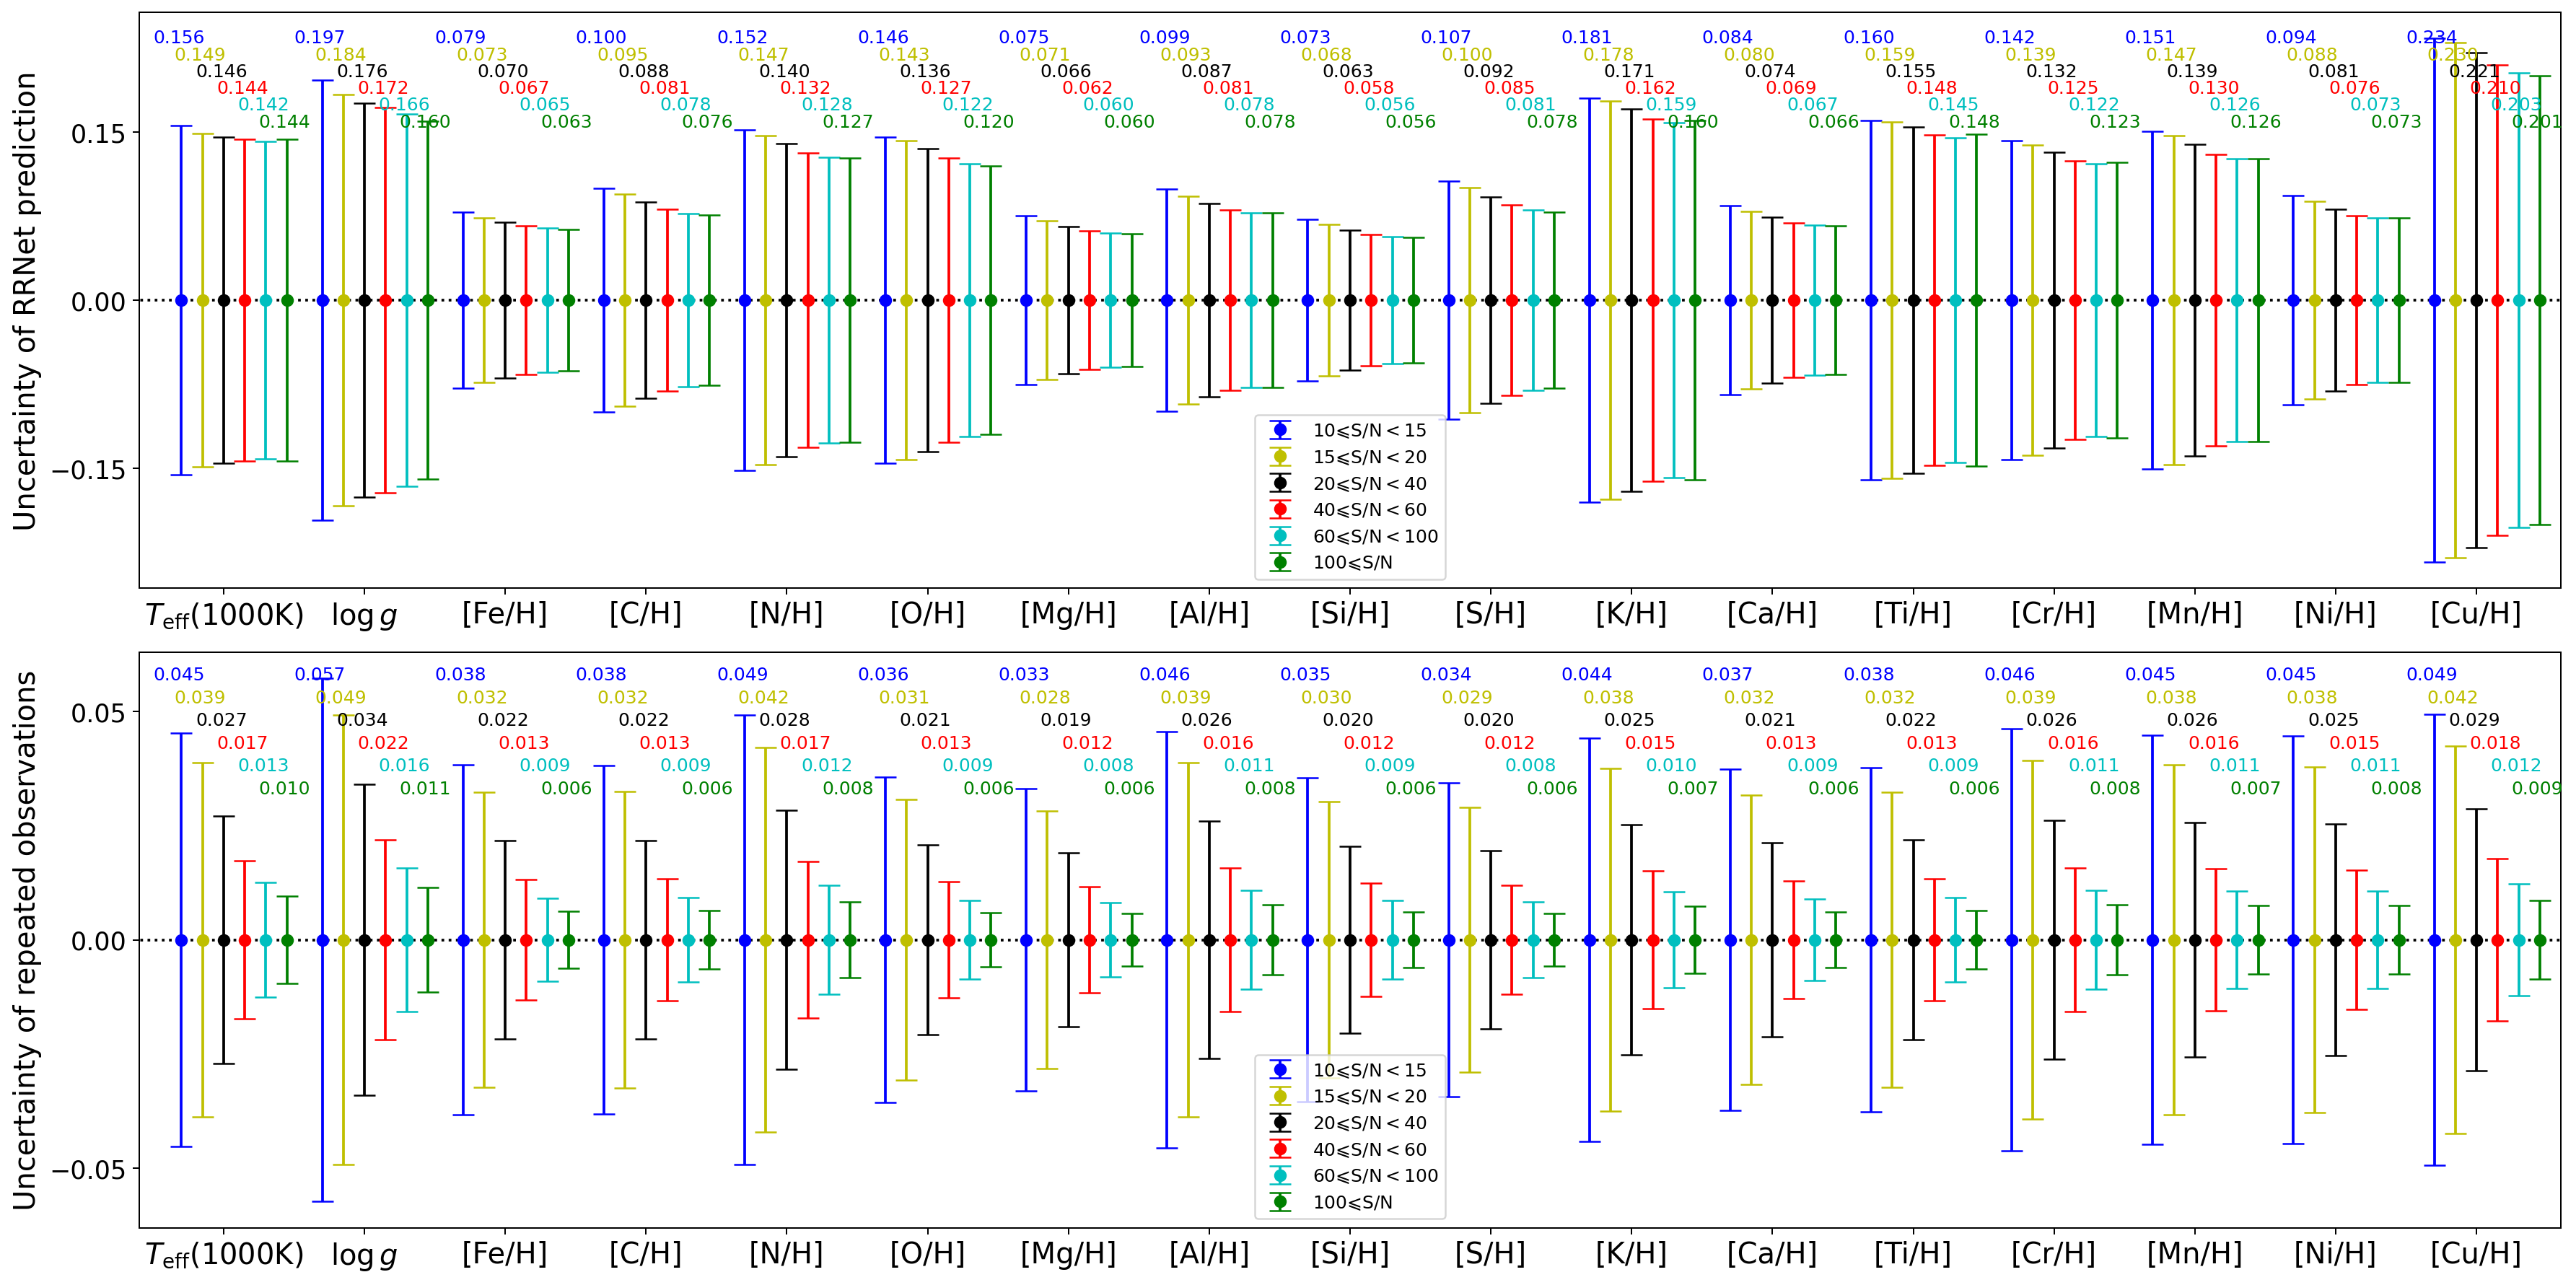

In [22]:
plt.figure(figsize=(20,10), dpi=180)
snr_label_list = ["$10 \leqslant \mathrm{S/N} < 15$", 
                  "$15 \leqslant \mathrm{S/N} < 20$",
                  "$20 \leqslant \mathrm{S/N} < 40$",
                  "$40 \leqslant \mathrm{S/N} < 60$", 
                  "$60 \leqslant \mathrm{S/N} < 100$",
                  "$100 \leqslant \mathrm{S/N} $"]
color_list = ["b", "y", "k", "r", 'c', 'g']

for k in range(2):
    
    plt.subplot(2,1,k+1)
    errorbar_data_mean = errorbar_rrnet_pred if k == 0 else errorbar_repeated_observation
    
    for i in range(errorbar_data_mean.shape[0]):

        for j in range(errorbar_data_mean.shape[1]):
            if k == 0:
                plt.text(j +0.15*i -0.5, 0.23-0.015*i, "%.3f"%errorbar_data_mean[i, j], fontsize=10, color=color_list[i])
            else:
                plt.text(j +0.15*i -0.5, 0.057-0.005*i, "%.3f"%errorbar_data_mean[i, j], fontsize=10, color=color_list[i])


        plt.errorbar(np.arange(errorbar_data_mean.shape[1])+0.15*i -0.3, 
                      np.zeros_like(errorbar_data_mean[i]),
                      errorbar_data_mean[i],
                      fmt='o',
                      label=snr_label_list[i],
                     color=color_list[i],
                      capsize=6)



    plt.xlim([-0.6, len(label_name_list)-0.4])

    plt.plot([-1, len(label_name_list)], [0, 0], 'k:')        


    
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
    xlabel_name = [ ' ', '$T_\mathregular{eff}\mathregular{(1000K)}$', '$\log g$', '[Fe/H]', '[C/H]', '[N/H]', '[O/H]', '[Mg/H]', '[Al/H]', '[Si/H]',
                      '[S/H]', '[K/H]', '[Ca/H]', '[Ti/H]', '[Cr/H]', '[Mn/H]',  '[Ni/H]', '[Cu/H]']

    ax.set_xticklabels(xlabel_name, size=16)
    if k == 0:
        plt.yticks([-0.15,0,0.15])
        plt.ylabel('Uncertainty of RRNet prediction', fontsize=16)
    else:
        plt.ylabel('Uncertainty of repeated observations', fontsize=16)
    plt.legend(loc="lower center")

    plt.yticks(size = 14)
    plt.grid(False)

plt.tight_layout()


# plt.savefig('../images/uncertainties_analysis_snr.png')
# plt.savefig('../images/uncertainties_analysis_snr.pdf')

plt.show()